In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

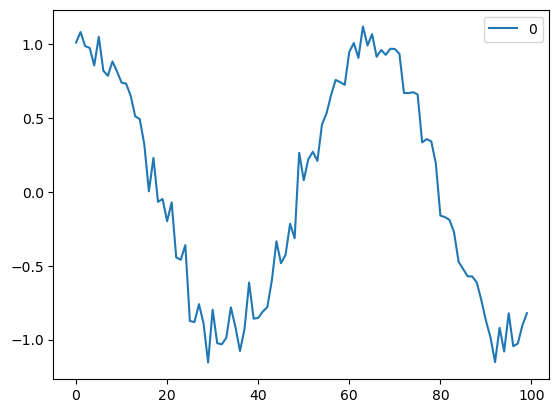

In [ ]:
X = torch.linspace(-5, 5, 100).unsqueeze(1)
y = torch.sin(X) + 0.1 * torch.randn(X.size()) # Adding noise to the sine wave

sns.lineplot(y.numpy())

In [17]:
dataset = TensorDataset(X, y) # like python zip function
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

## Defining custom activation function

To create a custom activation function in PyTorch, you can define a class that inherits from ```torch.nn.Module``` and implement the ```forward``` method.

In [18]:
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

In [19]:
class SwishNet(nn.Module):
    def __init__(self):
        super(SwishNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1,32),
            Swish(),
            nn.Linear(32, 32),
            Swish(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.net(x)

In [20]:
model = SwishNet()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [21]:
for epoch in range(100):
    for X,y in train_loader:
        output = model(X)
        loss = criterion(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0446
Epoch [20/100], Loss: 0.0254
Epoch [30/100], Loss: 0.0279
Epoch [40/100], Loss: 0.0080
Epoch [50/100], Loss: 0.0071
Epoch [60/100], Loss: 0.0064
Epoch [70/100], Loss: 0.0016
Epoch [80/100], Loss: 0.0089
Epoch [90/100], Loss: 0.0132
Epoch [100/100], Loss: 0.0056
